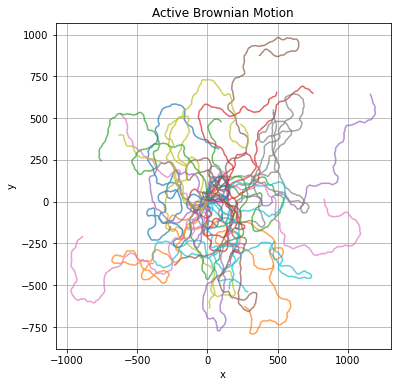

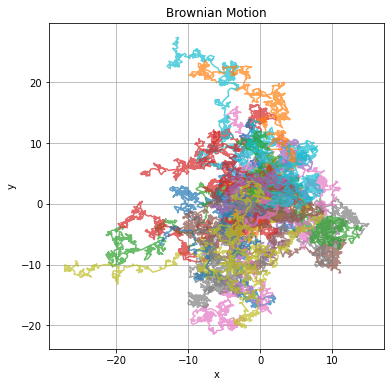

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#Active Brownian Motion

v0 = 20.0
D_t = 0.4
D_r = 0.15
t0 = 0.0
tn = 100.0
steps = 1000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 30   

def ABM(x0, y0, theta0, v0, D_t, D_r, t):
    
    N = len(t)
    x = np.zeros(N)
    y = np.zeros(N)
    theta = np.zeros(N)
    x[0], y[0], theta[0] = x0, y0, theta0
    
    for i in range(N-1):
        
        theta[i+1] = theta[i] + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + v0*np.cos(theta[i])*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        y[i+1] = y[i] + v0*np.sin(theta[i])*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, y, theta

paths = np.zeros((num_paths, 2, len(t)))
for i in range(num_paths):
    theta0 = np.random.uniform(0, 2*np.pi)
    x, y, _ = ABM(0, 0, theta0, v0, D_t, D_r, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = y
    
plt.figure(figsize=(6,6))
for path in paths:
    plt.plot(path[0, :], path[1, :], alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Active Brownian Motion')
plt.grid()
plt.show()

#Normal Brownian Motion

def BM(x0, y0, theta0, v0, D_t, D_r, t):
    
    v0 = 0
    N = len(t)
    x = np.zeros(N)
    y = np.zeros(N)
    theta = np.zeros(N)
    x[0], y[0], theta[0] = x0, y0, theta0
    
    for i in range(N-1):
        
        theta[i+1] = theta[i] + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + v0*np.cos(theta[i])*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        y[i+1] = y[i] + v0*np.sin(theta[i])*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, y, theta

pathss = np.zeros((num_paths, 2, len(t)))
for i in range(num_paths):
    theta0 = np.random.uniform(0, 2*np.pi)
    x, y, _ = BM(0, 0, theta0, v0, D_t, D_r, t)
    pathss[i, 0, :] = x
    pathss[i, 1, :] = y

plt.figure(figsize=(6,6))
for path in pathss:
    plt.plot(path[0, :], path[1, :], alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Brownian Motion')
plt.grid()
plt.show()


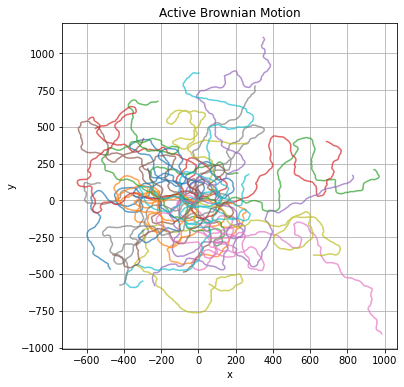

In [132]:
import numpy as np
import matplotlib.pyplot as plt

#Active Brownian Motion

v0 = 20.0
D_t = 0.4
D_r = 0.15
t0 = 0.0
tn = 100.0
steps = 1000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 30   

def ABM(x0, y0, theta0, v0, D_t, D_r, t):
    
    N = len(t)
    x = np.zeros(N)
    y = np.zeros(N)
    theta = np.zeros(N)
    x[0], y[0], theta[0] = x0, y0, theta0
    
    for i in range(N-1):
        
        theta[i+1] = theta[i] + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + v0*np.cos(theta[i])*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        y[i+1] = y[i] + v0*np.sin(theta[i])*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, y, theta

paths = np.zeros((num_paths, 2, len(t)))
for i in range(num_paths):
    theta0 = np.random.uniform(0, 2*np.pi)
    x, y, _ = ABM(0, 0, theta0, v0, D_t, D_r, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = y
    
plt.figure(figsize=(6,6))
for path in paths:
    plt.plot(path[0, :], path[1, :], alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Active Brownian Motion')
plt.grid()
plt.show()


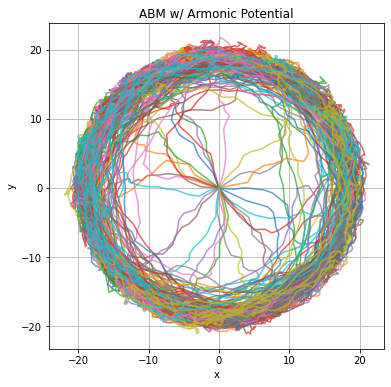

In [137]:
import numpy as np
import matplotlib.pyplot as plt

#ABM w/ Armonic Potential

v0 = 20.0
D_t = 0.4
D_r = 0.15
mu = 1.0
t0 = 0.0
tn = 100.0
steps = 1000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 30   

def V(x, y):
    k = 1.0
    return 0.5 * k * (x**2 + y**2)

def gradV(x, y, h=1e-5):
    dVdx = (V(x + h, y) - V(x - h, y)) / (2*h)
    dVdy = (V(x, y + h) - V(x, y - h)) / (2*h)
    return dVdx, dVdy

# v = mu * F = - mu dV/dr

def ABM_pot(x0, y0, theta0, v0, D_t, D_r, t):
    
    N = len(t)
    x = np.zeros(N)
    y = np.zeros(N)
    theta = np.zeros(N)
    x[0], y[0], theta[0] = x0, y0, theta0
    
    for i in range(N-1):
        
        dVdx, dVdy = gradV(x[i], y[i])
        
        theta[i+1] = theta[i] + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (v0*np.cos(theta[i]) - mu*dVdx)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        y[i+1] = y[i] + (v0*np.sin(theta[i]) - mu*dVdy)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, y, theta

paths = np.zeros((num_paths, 2, len(t)))
for i in range(num_paths):
    theta0 = np.random.uniform(0, 2*np.pi)
    x, y, _ = ABM_pot(0, 0, theta0, v0, D_t, D_r, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = y
    
plt.figure(figsize=(6,6))
for path in paths:
    plt.plot(path[0, :], path[1, :], alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ABM w/ Armonic Potential')
plt.grid()
plt.show()

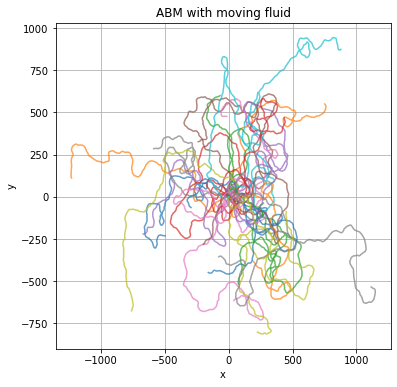

In [131]:
import numpy as np
import matplotlib.pyplot as plt

#ABM with moving fluid

v0 = 20.0
D_t = 0.4
D_r = 0.15
t0 = 0.0
tn = 100.0
steps = 1000
t = np.linspace(t0, tn, steps+1)
dt = t[1] - t[0]

num_paths = 30   

#uniform drift
def fluid_velocity(x, y):
    return 5, 0.0

#shear rate
def fluid_velocity(x, y):
    gamma = 2
    return gamma*y, 0.0

#rotating fluid
def fluid_velocity(x, y):
    Omega = 10
    return -Omega*y, Omega*x

def ABM_fluid(x0, y0, theta0, v0, D_t, D_r, t):
    
    N = len(t)
    x = np.zeros(N)
    y = np.zeros(N)
    theta = np.zeros(N)
    x[0], y[0], theta[0] = x0, y0, theta0
    
    for i in range(N-1):
        
        ux, uy = fluid_velocity(x[i], y[i])
        
        theta[i+1] = theta[i] + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (v0*np.cos(theta[i]) + ux)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        y[i+1] = y[i] + (v0*np.sin(theta[i]) + uy)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
    return x, y, theta

paths = np.zeros((num_paths, 2, len(t)))
for i in range(num_paths):
    theta0 = np.random.uniform(0, 2*np.pi)
    x, y, _ = ABM(0, 0, theta0, v0, D_t, D_r, t)
    paths[i, 0, :] = x
    paths[i, 1, :] = y
    
plt.figure(figsize=(6,6))
for path in paths:
    plt.plot(path[0, :], path[1, :], alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ABM with moving fluid')
plt.grid()
plt.show()
